# Importing Libraries

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
width, height= 224, 224
img = cv2.imread('/content/drive/MyDrive/classification/train/trouser/trouser104.jpg')
img_resized = cv2.resize(img,(width, height))

In [ ]:

img_resized.shape

(224, 224, 3)

(320, 146, 3)


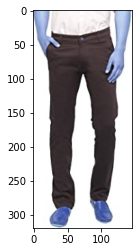

In [ ]:
plt.imshow(img)
print(img.shape)

(224, 224, 3)


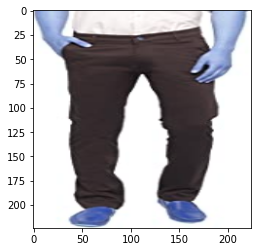

In [ ]:
plt.imshow(img_resized)
print(img_resized.shape)

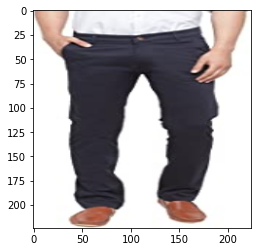

In [ ]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

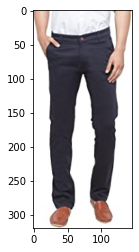

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#Normalize train dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
#Normalize test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = test_datagen.flow_from_directory('/content/drive/MyDrive/classification/train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 561 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/classification/test',
                                            target_size = (width, height),
                                            batch_size = 2,
                                            class_mode = 'categorical')

Found 12 images belonging to 3 classes.


In [ ]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(3,activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# optimization method to use
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# fit the model
r = model.fit_generator( training_set,validation_data=test_set,epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
18/18 [==============================] - 290s 16s/step - loss: 0.8521 - accuracy: 0.6684 - val_loss: 0.3170 - val_accuracy: 0.8333
Epoch 2/10
18/18 [==============================] - 288s 16s/step - loss: 0.2205 - accuracy: 0.9144 - val_loss: 0.1887 - val_accuracy: 0.9167
Epoch 3/10
18/18 [==============================] - 289s 16s/step - loss: 0.1553 - accuracy: 0.9358 - val_loss: 0.1192 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 290s 16s/step - loss: 0.1091 - accuracy: 0.9572 - val_loss: 0.2600 - val_accuracy: 0.8333
Epoch 5/10
18/18 [==============================] - 288s 16s/step - loss: 0.0786 - accuracy: 0.9733 - val_loss: 0.0831 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 288s 16s/step - loss: 0.0645 - accuracy: 0.9875 - val_loss: 0.1616 - val_accuracy: 0.9167
Epoch 7/10
18/18 [==============================] - 287s 16s/step - loss: 0.0366 - accuracy: 0.9982 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 

In [ ]:
#We get an accuracy score of 100%.

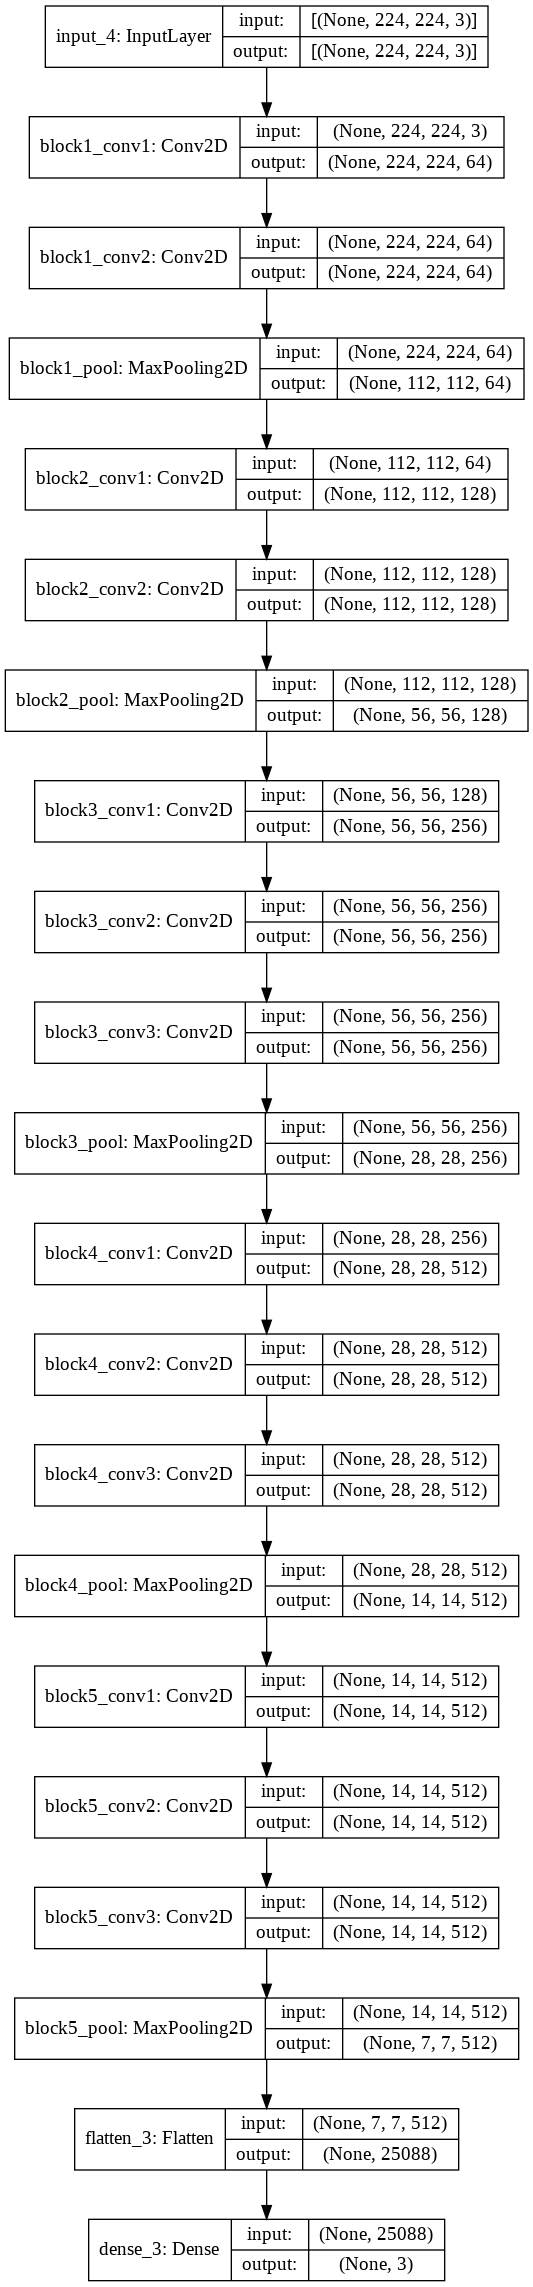

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)